In [ ]:
Assignment 3: Pneumonia Detection from X-Ray Images
Dataset: Chest X-Ray Images (5,863 images of normal and pneumonia cases)
Task:
Build a CNN model to detect pneumonia from chest X-rays.
Use Conv2D, MaxPooling, and Dropout layers.
Train the model on the dataset and evaluate performance.
Expected Outcomes:
Achieve 85%+ accuracy on pneumonia detection.
Display ROC curve, precision, and recall.

In [1]:
import tensorflow as tf
import cv2

In [2]:
import os
import shutil
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras


import matplotlib.pyplot as plt

# Dataset
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\tolgadincer\labeled-chest-xray-images\versions\1\chest_xray\train"
test_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\tolgadincer\labeled-chest-xray-images\versions\1\chest_xray\test"

In [4]:
# Initialize Image Data Generator
data_generator = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.1
)

# Load Training Data
train_data = data_generator.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    shuffle=True,
    subset='training',
    seed=42
)

# Load Validation Data
valid_data = data_generator.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    shuffle=True,
    subset='validation',
    seed=42
)

# Load Testing Data
test_data = data_generator.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16,
    shuffle=False,
    seed=42
)

Found 4710 images belonging to 2 classes.
Found 522 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [40]:
model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224,224,3)),
        tf.keras.layers.Rescaling(1.0/255.0),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(256,3,activation='relu'),
        tf.keras.layers.Conv2D(256,3,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(2,activation='softmax')    ]
)

In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 220, 220, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 108, 108, 128)    

In [44]:
history=model.fit(train_data,epochs=20,batch_size=16,validation_data=valid_data,verbose=2)

Epoch 1/20
295/295 - 119s - loss: 0.3435 - accuracy: 0.8773 - val_loss: 0.6783 - val_accuracy: 0.7433 - 119s/epoch - 404ms/step
Epoch 2/20
295/295 - 127s - loss: 0.1848 - accuracy: 0.9323 - val_loss: 0.4899 - val_accuracy: 0.7720 - 127s/epoch - 431ms/step
Epoch 3/20
295/295 - 130s - loss: 0.1502 - accuracy: 0.9456 - val_loss: 0.1398 - val_accuracy: 0.9444 - 130s/epoch - 439ms/step
Epoch 4/20
295/295 - 129s - loss: 0.1278 - accuracy: 0.9539 - val_loss: 0.1055 - val_accuracy: 0.9636 - 129s/epoch - 437ms/step
Epoch 5/20
295/295 - 129s - loss: 0.1237 - accuracy: 0.9524 - val_loss: 0.1358 - val_accuracy: 0.9464 - 129s/epoch - 438ms/step
Epoch 6/20
295/295 - 129s - loss: 0.1110 - accuracy: 0.9601 - val_loss: 0.1659 - val_accuracy: 0.9425 - 129s/epoch - 437ms/step
Epoch 7/20
295/295 - 129s - loss: 0.1010 - accuracy: 0.9645 - val_loss: 0.0922 - val_accuracy: 0.9655 - 129s/epoch - 437ms/step
Epoch 8/20
295/295 - 129s - loss: 0.0951 - accuracy: 0.9667 - val_loss: 0.1144 - val_accuracy: 0.9521 - 

In [47]:
loss,acc=model.evaluate(test_data)

39/39 [==============================] - 5s 126ms/step - loss: 0.3899 - accuracy: 0.8830


In [48]:
print(f'Model accuracy : {acc*100 :.2f} %')

Model accuracy : 88.30 %


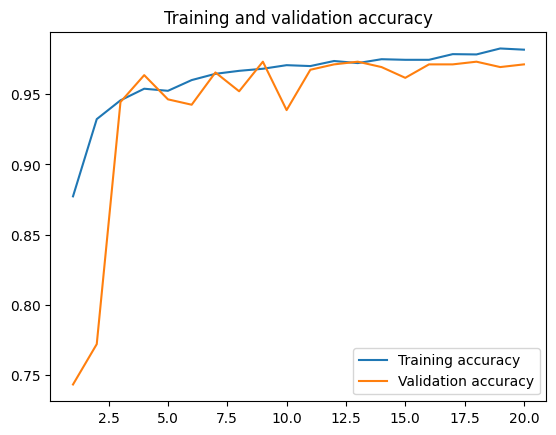

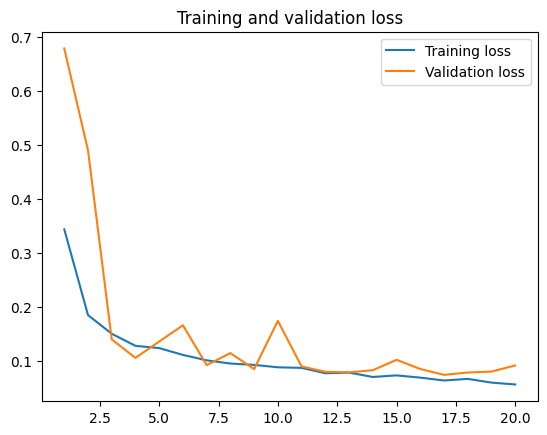

In [49]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [50]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from the test data
y_true = test_data.classes

# Get model predictions (probabilities) and convert to class labels
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))

39/39 [==============================] - 6s 137ms/step
Confusion Matrix:
[[166  68]
 [  5 385]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.97      0.71      0.82       234
         Dog       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.85      0.87       624
weighted avg       0.90      0.88      0.88       624



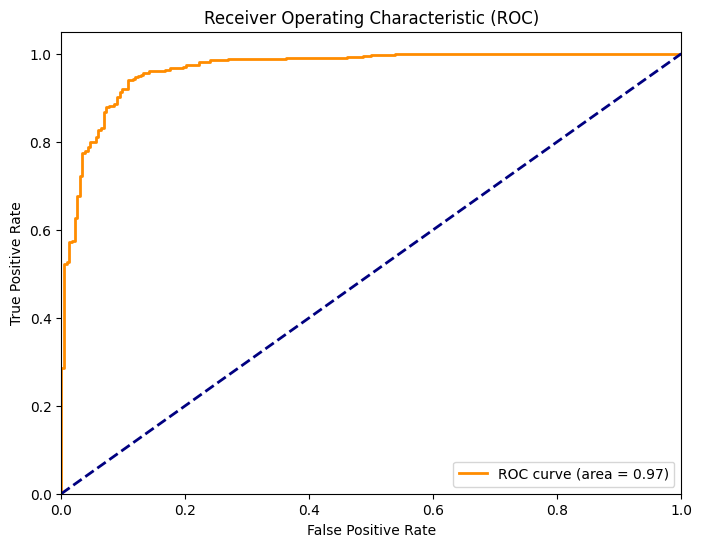

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming test_data.classes are 0 for "Cat" and 1 for "Dog"
# and y_pred_probs contains probabilities for each class,
# so we select the probabilities for class "Dog" (index 1).
y_true = test_data.classes
y_prob = y_pred_probs[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
